In [1]:
workspace()
include("../src/Quantum.jl")

trajectory (generic function with 1 method)

In [26]:
const ωq = 0;
const Ω  = 2*π;
const dt = 1e-6;
const τ  = 2;
const T1 = 10;
const T2 = 10;

In [27]:
function run(T)
    q = qubit()
    const H = (ωq/2)*q("z") + (Ω/2)*q("x");
    const D1 = sqrt(1/T1) * q("d");
    const D2 = sqrt(1/T2) * q("z");
    h = ham(dt, H);
    inc = lind(dt, H, D1, D2);
    incr = lind_runge(dt, H, D1);
    z(ρ) = real(expect(ρ, q("z")));
    init = ground(q)
    trajectory(init, h, dt, T, z)
end

run (generic function with 1 method)

In [28]:
ts, traj = run(10*τ)

INFO: Trajectory: steps = 20000000, points = 1000, values = 1
INFO: Time elapsed: 17.264277707 s, Steps per second: 1.158461439246356e6


(
[0.0; 0.02; … ; 19.98; 20.0],

[-1.0; -0.992115; … ; -0.992115; -1.0])

In [5]:
using PyPlot

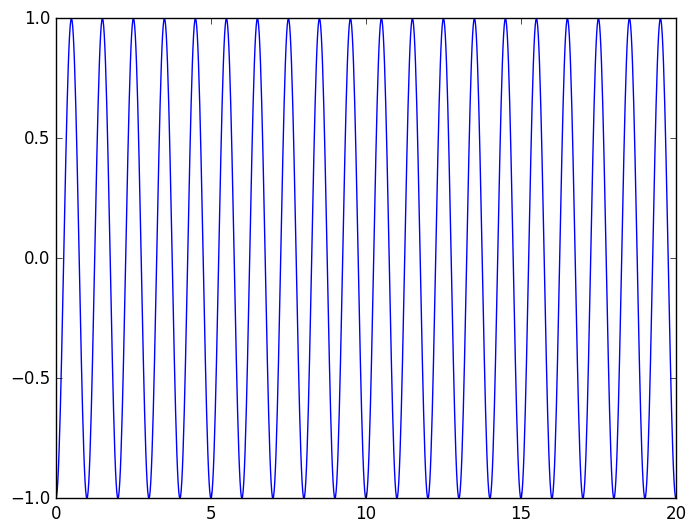

In [29]:
figure()
plot(ts,traj)
gcf()